In [1]:
import matplotlib.pyplot as plt
from math import exp
%matplotlib inline

In [2]:
import numpy as np

## Q1

Solving the equation for all c in [0,4)

In [3]:
x_list = [] 
for c_ in range(0,400,2):
    c = c_/100
    
    #the accuracy
    delta = 1
    
    x=1
    itr = 0
    while delta>1e-7:
        x_new = 1-exp(-1*c*x)
        delta = abs(x_new- x)
        x = x_new
        itr += 1
        
    if c==3:
        print("For c=3, x={}".format(x))
        print("Number of iterations: {}".format(itr))
    x_list.append(x)

For c=3, x=0.9404798005896199
Number of iterations: 9


A plot of the percolation transition

Text(0,0.5,'x')

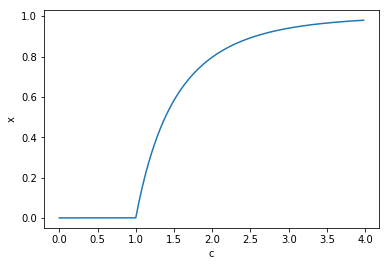

In [4]:
plt.plot([i/100 for i in range(0,400,2)], x_list)
plt.xlabel('c')
plt.ylabel('x')

## Q2

### a)

The overrelaxation formula is given by:
$$
x_{n+1} = (1+\omega )f(x_n) - \omega x_n 
$$

$$
\implies f(x_n) = \frac{x_{n+1} + \omega x_n}{1+\omega}  \ \ \ \ \ (1)
$$

Denote the true solution by $x^*$, then the Taylor series expansion of $f$ around $x_n$ is given by:

$$
f(x^*) \approx f(x_n) + f'(x_n)(x^* - x_n)
$$
Since, $x^* = f(x^*)$,

$$
x^* \approx f(x_n) + f'(x_n)(x^* - x_n)
$$

Substituting in equation 1 and solving for $x^*$:
$$
x^* \approx \frac{\frac{x_{n+1} + \omega x_n}{1 + \omega} - f'(x_n) x_n}{1-f'(x_n)}
\\
\implies x^* - x_{n+1} \approx \frac{x_n - x_{n+1}}{1 - \frac{1}{(1+\omega) f'(x_n) - \omega}}
$$


### b) and c)

In [5]:
itr_list = [] 
w_list = []
for w_ in range(0,60,2):
    w = w_/100
    delta = 1
    x=1
    itr = 0
    while delta>1e-7:
        x_new = (1+w)*(1-exp(-3*x)) - w*x
        delta = abs(x_new- x)
        x = x_new
        itr += 1
    
    print("For w={}".format(w), end=', ')
    print("Number of iterations: {}".format(itr), end='\n \n')
    itr_list.append(itr)
    w_list.append(w)

For w=0.0, Number of iterations: 9
 
For w=0.02, Number of iterations: 9
 
For w=0.04, Number of iterations: 8
 
For w=0.06, Number of iterations: 8
 
For w=0.08, Number of iterations: 7
 
For w=0.1, Number of iterations: 7
 
For w=0.12, Number of iterations: 7
 
For w=0.14, Number of iterations: 6
 
For w=0.16, Number of iterations: 6
 
For w=0.18, Number of iterations: 5
 
For w=0.2, Number of iterations: 4
 
For w=0.22, Number of iterations: 4
 
For w=0.24, Number of iterations: 5
 
For w=0.26, Number of iterations: 6
 
For w=0.28, Number of iterations: 6
 
For w=0.3, Number of iterations: 7
 
For w=0.32, Number of iterations: 7
 
For w=0.34, Number of iterations: 7
 
For w=0.36, Number of iterations: 8
 
For w=0.38, Number of iterations: 8
 
For w=0.4, Number of iterations: 9
 
For w=0.42, Number of iterations: 9
 
For w=0.44, Number of iterations: 9
 
For w=0.46, Number of iterations: 10
 
For w=0.48, Number of iterations: 10
 
For w=0.5, Number of iterations: 11
 
For w=0.52, Num

### d)

The recursive formula for the error can be obtained by rearranging the previous equations to get:

$$
\epsilon_{n+1} = \epsilon_{n} [(1+\omega) f'(x^*) - \omega]
$$

(Note: This is an approximation for when $x_{n}$ is close to $x^*$)

In order to find the conditions when the overrelaxation method with $\omega < 0$ converges faster than the ordinary relaxation method ($\omega = 0$), we need to find values of $f'(x^*)$ and $\omega$ that satisfy the following constraints:

1. Overrelaxation method converges:

$$
        |(1+\omega) f'(x^*) - \omega| < 1
$$

2. Ordinary relaxation method converges:
$$
        |f'(x^*)| < 1
$$

3. Overrelaxation converges faster:
$$
|(1+\omega) f'(x^*) - \omega | < |f'(x^*)|
$$

4. Overrelaxation factor is negative:
$$
\omega < 0
$$

We can plot this region

Text(0,0.5,"f '(x*)")

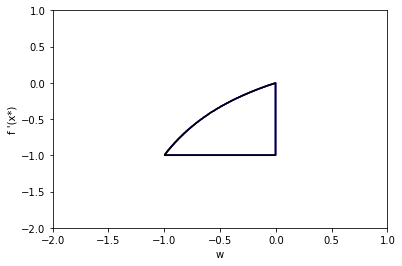

In [6]:
fy, wx = np.meshgrid(np.linspace(-2,1,1000), np.linspace(-2,1,1000))
mask = np.zeros((1000, 1000), dtype=bool)

mask[(np.abs((1+wx)*fy - wx) < 1) & \
(np.abs(fy) < 1) & \
(np.abs((1+wx)*fy - wx) < np.abs(fy)) & \
(wx < 0)] = 2
plt.contour(wx, fy, mask, cmap='flag')
plt.xlabel("w")
plt.ylabel("f '(x*)")

Therefore, when the current estimate is sufficiently close to the actual solution, when $f'(x^*)$ and $\omega$ fall inside this region, the overrelaxation converges faster than ordinary relaxation 

We can take the simple example of the case when $f(x) = -0.75x$

This resembles all cases where the function is locally linear with slope $-0.75$

Text(0,0.5,'Number of iterations')

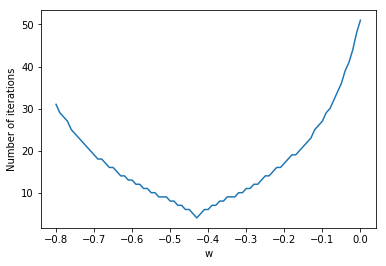

In [7]:
itr_list = [] 
w_list = []
for w_ in range(-80,1,1):
    w = w_/100
    delta = 1
    x=0.1
    itr = 0
    while delta>1e-7:
        x_new = (1+w)*(-0.75*x) - w*x
        delta = abs(x_new- x)
        x = x_new
        itr += 1
       
    itr_list.append(itr)
    w_list.append(w)
plt.plot(w_list, itr_list)
plt.xlabel("w")
plt.ylabel("Number of iterations")